In [1]:
# SPDX-FileCopyrightText: 2020 G2Elab / MAGE
#
# SPDX-License-Identifier: Apache-2.0

# if NoLoad is not installed 
!pip install noload --quiet

<H1>NoLoad tutorial</H1>
Based on test functions: 
<A href="https://en.wikipedia.org/wiki/Test_functions_for_optimization" 
target="_blank">https://en.wikipedia.org/wiki/Test_functions_for_optimization</A>


<H2>Constrained mono-objective optimization</H2>

<img src=".\img\BinhAndKorn.png"/>

<H3>function definition</H3>

In [2]:
def BinhAndKorn(x, y):
    import autograd.numpy as np
    f1 = 4*x**2   + 4*y**2
    f2 = (x-5)**2 + (y-5)**2
    g1 = (x-5)**2 + y
    g2 = (x-8)**2 + (y+3)**2
    return locals().items()

<H3>plot function</H3>

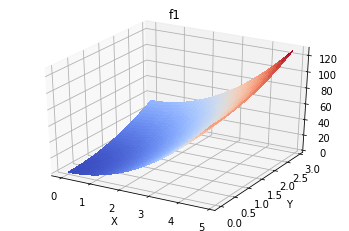

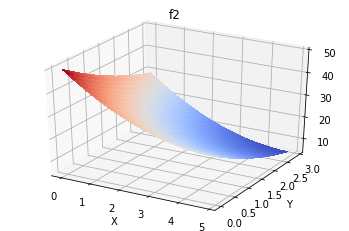

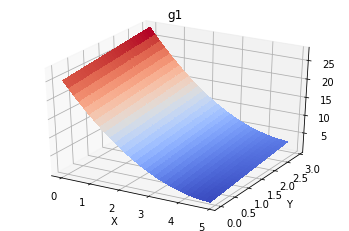

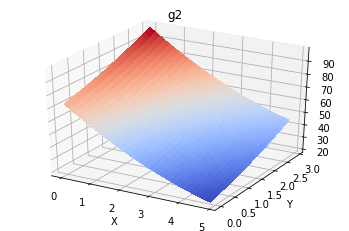

In [3]:
#Plot
from plotTools import plot3D
%matplotlib inline
plot3D(BinhAndKorn, [[0, 5], [0, 3]], outNames = ['f1','f2','g1','g2'])



<H3>optimize using NoLoad</H3>

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.384706321463904e-28
            Iterations: 2
            Function evaluations: 2
            Gradient evaluations: 2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.000000000000256
            Iterations: 2
            Function evaluations: 2
            Gradient evaluations: 2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 13.723810443972937
            Iterations: 9
            Function evaluations: 9
            Gradient evaluations: 9
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.6982116401101095
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
add a point :0 / 90.66666672556622
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.138839744835705
            Iterations

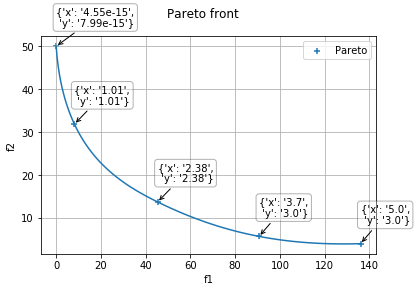

In [4]:
#Optimize
from noload.optimization.optimProblem import Spec, OptimProblem
spec = Spec(variables={'x':0, 'y':0}, bounds={'x':[0, 5], 'y':[0, 3]}, 
            objectives={'f1':[0.,140.],'f2':[0.,50.]},
            ineq_cstr={'g1':[None, 25],'g2':[20, None]} #inequality constraints
            )
optim = OptimProblem(model=BinhAndKorn, specifications=spec)
result = optim.run(nbParetoPts=5)

result.printResults()
import noload.gui.plotPareto as pp
pp.plot([result.resultsHandler], ['f1', 'f2'], ['Pareto'])


<H3>check constraints</H3>

In [5]:
#get constraints for each optimal solutions :
g1i = result.resultsHandler.oNames.index('g1')
g2i = result.resultsHandler.oNames.index('g2')
sols = result.resultsHandler.solutions
for sol in sols:
    print('----------')
    print('x  =', sol.iData[0], '  \ty =', sol.iData[1])
    print('g1 =', sol.oData[g1i[0][0]], '  \tg2 =', sol.oData[g2i[0][0]])

----------
x  = 4.551914400963142e-15   	y = 7.993605777301127e-15
g1 = 24.999999999999964   	g2 = 72.99999999999997
----------
x  = 1.0083847483687531   	y = 1.0088955027485318
g1 = 16.941887819803714   	g2 = 64.95392697880007
----------
x  = 2.3804761297606554   	y = 2.380476162120447
g1 = 9.242381468874163   	g2 = 60.52857225933616
----------
x  = 3.6968455041284978   	y = 3.0
g1 = 4.6982116401101095   	g2 = 54.51713861533912
----------
x  = 4.999999999999953   	y = 2.999999999999936
g1 = 2.999999999999936   	g2 = 44.99999999999952
